# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


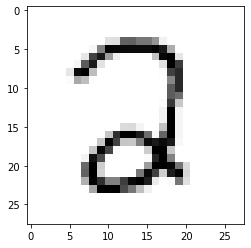

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.22553797002779521
train accuracy is: 0.7505424803872476, test accuracy is 0.7575604838709677


Epoch 10 Loss 0.0837020754391369
train accuracy is: 0.9197963612084794, test accuracy is 0.9324596774193549


Epoch 20 Loss 0.05170066241199466
train accuracy is: 0.9485060924720414, test accuracy is 0.9576612903225806


Epoch 30 Loss 0.040713021452328156
train accuracy is: 0.9567684860624269, test accuracy is 0.9632056451612904


Epoch 40 Loss 0.03538028516860295
train accuracy is: 0.9608579535970623, test accuracy is 0.9672379032258065


Epoch 50 Loss 0.03217741639174884
train accuracy is: 0.9636955433149724, test accuracy is 0.967741935483871


Epoch 60 Loss 0.029977763030787186
train accuracy is: 0.9660323819061927, test accuracy is 0.96875


Epoch 70 Loss 0.02834884601124028
train accuracy is: 0.9676180938073777, test accuracy is 0.96875


Epoch 80 Loss 0.027053401686396052
train accuracy is: 0.9689534301452178, test accuracy is 0.9707661290322581


Epoch 90 Loss 0.025981802104899806
train accuracy is: 0.970372225004173, test accuracy is 0.9722782258064516


Epoch 100 Loss 0.025089325487578158
train accuracy is: 0.971874478384243, test accuracy is 0.9732862903225806


Epoch 110 Loss 0.024300867236591396
train accuracy is: 0.9726256050742781, test accuracy is 0.9747983870967742


Epoch 120 Loss 0.023592923313210692
train accuracy is: 0.9733767317643132, test accuracy is 0.9737903225806451


Epoch 130 Loss 0.02296927444786556
train accuracy is: 0.9742947754965782, test accuracy is 0.9737903225806451


Epoch 140 Loss 0.022396753678993863
train accuracy is: 0.9749624436654982, test accuracy is 0.9737903225806451


Epoch 150 Loss 0.02187087346449361
train accuracy is: 0.9755466533133033, test accuracy is 0.9732862903225806


Epoch 160 Loss 0.021379663142593205
train accuracy is: 0.9756301118344183, test accuracy is 0.9727822580645161


Epoch 170 Loss 0.02091044695652295
train accuracy is: 0.9762143214822233, test accuracy is 0.9722782258064516


Epoch 180 Loss 0.020475932807008435
train accuracy is: 0.9765481555666834, test accuracy is 0.9727822580645161


Epoch 190 Loss 0.020062713665968162
train accuracy is: 0.9775496578200634, test accuracy is 0.9727822580645161


Epoch 200 Loss 0.01966905703043751
train accuracy is: 0.9782173259889835, test accuracy is 0.9732862903225806


Epoch 210 Loss 0.019292534246689624
train accuracy is: 0.9788015356367885, test accuracy is 0.9732862903225806


Epoch 220 Loss 0.018920160580233273
train accuracy is: 0.9794692038057086, test accuracy is 0.9732862903225806


Epoch 230 Loss 0.018554908647518763
train accuracy is: 0.9796361208479386, test accuracy is 0.9732862903225806


Epoch 240 Loss 0.018211754571837612
train accuracy is: 0.9802203304957436, test accuracy is 0.9737903225806451


0.0028356939115041536

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.2396605319930249
train accuracy is: 0.7047237522951093, test accuracy is 0.7116935483870968


Epoch 10 Loss 0.10317972742425886
train accuracy is: 0.9063595393089634, test accuracy is 0.9173387096774194


Epoch 20 Loss 0.07907930132455913
train accuracy is: 0.928392588883325, test accuracy is 0.9425403225806451


Epoch 30 Loss 0.06790325014466538
train accuracy is: 0.9384910699382407, test accuracy is 0.9516129032258065


Epoch 40 Loss 0.06121021533376569
train accuracy is: 0.943748956768486, test accuracy is 0.9561491935483871


Epoch 50 Loss 0.05667756081164476
train accuracy is: 0.9460023368385913, test accuracy is 0.9606854838709677


Epoch 60 Loss 0.05336780099466672
train accuracy is: 0.9483391754298114, test accuracy is 0.9606854838709677


Epoch 70 Loss 0.050822075423581976
train accuracy is: 0.9497579702887665, test accuracy is 0.9627016129032258


Epoch 80 Loss 0.04878887273337212
train accuracy is: 0.9510098481054916, test accuracy is 0.9637096774193549


Epoch 90 Loss 0.047119072681645224
train accuracy is: 0.9523451844433317, test accuracy is 0.9642137096774194


Epoch 100 Loss 0.045715658336421855
train accuracy is: 0.9530128526122517, test accuracy is 0.9652217741935484


Epoch 110 Loss 0.044515088474073844
train accuracy is: 0.9541812719078618, test accuracy is 0.9662298387096774


Epoch 120 Loss 0.04347212552016487
train accuracy is: 0.9552662326823569, test accuracy is 0.9662298387096774


Epoch 130 Loss 0.04255490345952501
train accuracy is: 0.956685027541312, test accuracy is 0.9662298387096774


Epoch 140 Loss 0.04174011755420222
train accuracy is: 0.957603071273577, test accuracy is 0.9667338709677419


Epoch 150 Loss 0.041009833048621276
train accuracy is: 0.958103822400267, test accuracy is 0.967741935483871


Epoch 160 Loss 0.04034954582207045
train accuracy is: 0.9585211150058421, test accuracy is 0.967741935483871


Epoch 170 Loss 0.03974943654324397
train accuracy is: 0.9587714905691871, test accuracy is 0.967741935483871


Epoch 180 Loss 0.03920024712628427
train accuracy is: 0.9590218661325322, test accuracy is 0.967741935483871


Epoch 190 Loss 0.03869507686494425
train accuracy is: 0.9591887831747622, test accuracy is 0.9672379032258065


Epoch 200 Loss 0.03822825411063735
train accuracy is: 0.9595226172592222, test accuracy is 0.967741935483871


Epoch 210 Loss 0.03779523938143234
train accuracy is: 0.9596060757803372, test accuracy is 0.9682459677419355


Epoch 220 Loss 0.03739177414059195
train accuracy is: 0.9596895343014522, test accuracy is 0.96875


Epoch 230 Loss 0.03701490979543656
train accuracy is: 0.9600233683859122, test accuracy is 0.9692540322580645


Epoch 240 Loss 0.036661220182635554
train accuracy is: 0.9602737439492572, test accuracy is 0.9692540322580645


0.03431385462031695

### Comparing results of NN and LR

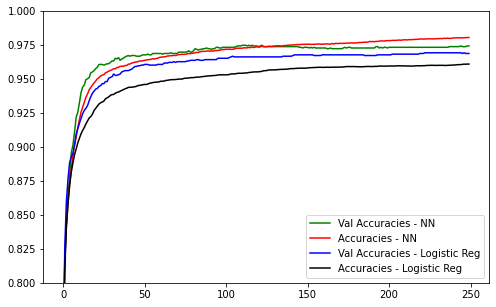

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

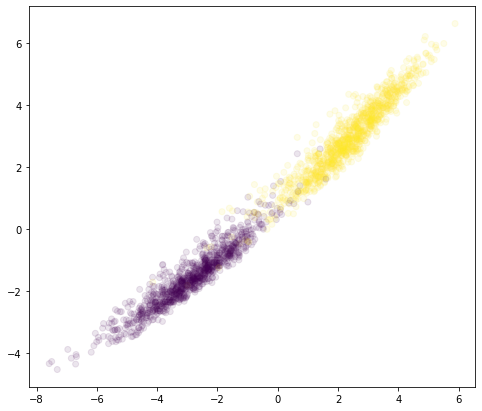

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

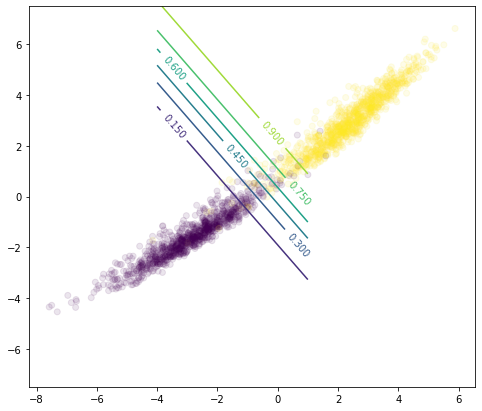

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );